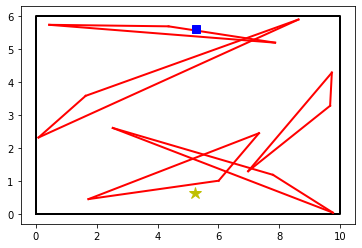

In [1]:
import numpy as np
import pylab as pl
import sys
import random
import math
sys.path.append('osr_examples/scripts/')
import environment_2d
pl.ion()
np.random.seed(4)
env = environment_2d.Environment(10, 6, 5)
pl.clf()
env.plot()
q = env.random_query()
if q is not None:
  x_start, y_start, x_goal, y_goal = q
  env.plot_query(x_start, y_start, x_goal, y_goal)

# Exercise 1: Solving a 2D motion planning problem by PRM

## I am not using OOP to maximize the time and space complexity needed

In [2]:
#Variables Initialization
x_min = 0
x_max = 10
y_min = 0
y_max = 6
tresh = 3         #CHANGEABLE, radius treshold of nearest neighbours
n_vert = 600        #CHANGEABLE, number of nodes
num_steps = 300         #CHANGEABLE, number of iterations during line check
vert = []
vert_f = [(x_start,y_start),(x_goal, y_goal)]
vert_o = []
edges = []
edgesdist =[]
path = [0]
paths = []

In [3]:
#Vertex Randomization
for i in range(n_vert):
    vert.append((round(random.uniform(x_min,x_max),2), round(random.uniform(y_min,y_max),2)))

In [4]:
#Checking if vertex/node is within an obstacle
for i in range(n_vert):
    if env.check_collision(vert[i][0],vert[i][1]) == False:
        vert_f.append((vert[i][0], vert[i][1]))
    else:
        vert_o.append((vert[i][0], vert[i][1]))

In [5]:
num_free = len(vert_f)

In [6]:
#Line Intersection Check
for i in range(num_free):
    for j in range(i+1, num_free):
        x_dist = vert_f[i][0] - vert_f[j][0]
        y_dist = vert_f[i][1] - vert_f[j][1]
        euclid = (math.sqrt(math.pow((x_dist), 2) + math.pow((y_dist), 2)))
        if euclid <= tresh:
            check = True
            y = vert_f[j][1]
            x = vert_f[j][0]
            x_stepsize = x_dist/num_steps
            y_stepsize = y_dist/num_steps
            for z in range(num_steps):
                x += x_stepsize
                y += y_stepsize
                if env.check_collision(x,y) == True:
                    check = False
            if check == True:
                edges.append((i, j))
                edgesdist.append(euclid)

In [7]:
copyedges = edges.copy()

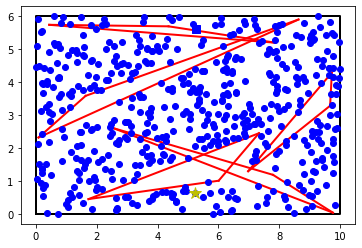

In [8]:
#Plotting the vertex that are not within the obstacle
pl.ion()
np.random.seed(4)
env = environment_2d.Environment(10, 6, 5)
pl.clf()
env.plot()
for i in range(len(vert_f)):
    pl.plot(vert_f[i][0],vert_f[i][1], 'bo')
q = env.random_query()
if q is not None:
  x_start, y_start, x_goal, y_goal = q
  env.plot_query(x_start, y_start, x_goal, y_goal)


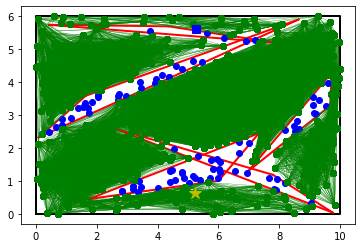

In [9]:
#Plotting the edges that don't intersect the obstacle
pl.ion()
np.random.seed(4)
env = environment_2d.Environment(10, 6, 5)
pl.clf()
env.plot()
for i in range(len(vert)):
    pl.plot(vert[i][0],vert[i][1], 'bo')
for i in range(len(edges)):
    dot1 = edges[i][0]
    dot2 = edges[i][1]
    pl.plot([vert_f[dot1][0],vert_f[dot2][0]], [vert_f[dot1][1],vert_f[dot2][1]], 'go-', linewidth=0.3)
q = env.random_query()
if q is not None:
  x_start, y_start, x_goal, y_goal = q
  env.plot_query(x_start, y_start, x_goal, y_goal)


In [10]:
next_edge = 0
next_edges = []
next_edges_dist = []
visited = []

In [11]:
temp = next_edge
while temp < len(edges):
    if edges[temp] == None:
        break
    elif edges[temp][0] == 0:
        next_edges.append(edges.pop(temp))
        next_edges_dist.append(edgesdist.pop(temp))
        edges.append(None)
    else: 
        temp += 1
        continue

In [12]:
while next_edge != 1:
    todel = []
    cost = 0
    for var in next_edges:
        if var[0] in path and var[1] in path:
            todel.append(next_edges.index(var)-cost)
            cost +=1
    for var in todel:
        next_edges.pop(var)
        next_edges_dist.pop(var)
    mindex = next_edges_dist.index(min(next_edges_dist))
    for i in next_edges[mindex]:
        if i in path:
            prev_path = i
        elif i not in path:
            next_edge = i
            path.append(i)
    paths.append((prev_path, next_edge))
    next_edges.pop(mindex)
    added_dist = next_edges_dist.pop(mindex)
    temp = 0
    while temp < len(edges):
        if edges[temp] == None:
            break
        elif edges[temp][0] == next_edge:
            next_edges.append(edges.pop(temp))
            next_edges_dist.append(edgesdist.pop(temp)+added_dist)
            edges.append(None)
        elif edges[temp][1] == next_edge:
            next_edges.append(edges.pop(temp))
            next_edges_dist.append(edgesdist.pop(temp)+added_dist)
            edges.append(None)
        else: 
            temp += 1
            continue


In [13]:
shortest=[1]
target = 1
for i in range(len(paths)-1, -1, -1):
    if paths[i][1]== target:
        target = paths[i][0]
        shortest.append(target)

<Figure size 432x288 with 0 Axes>

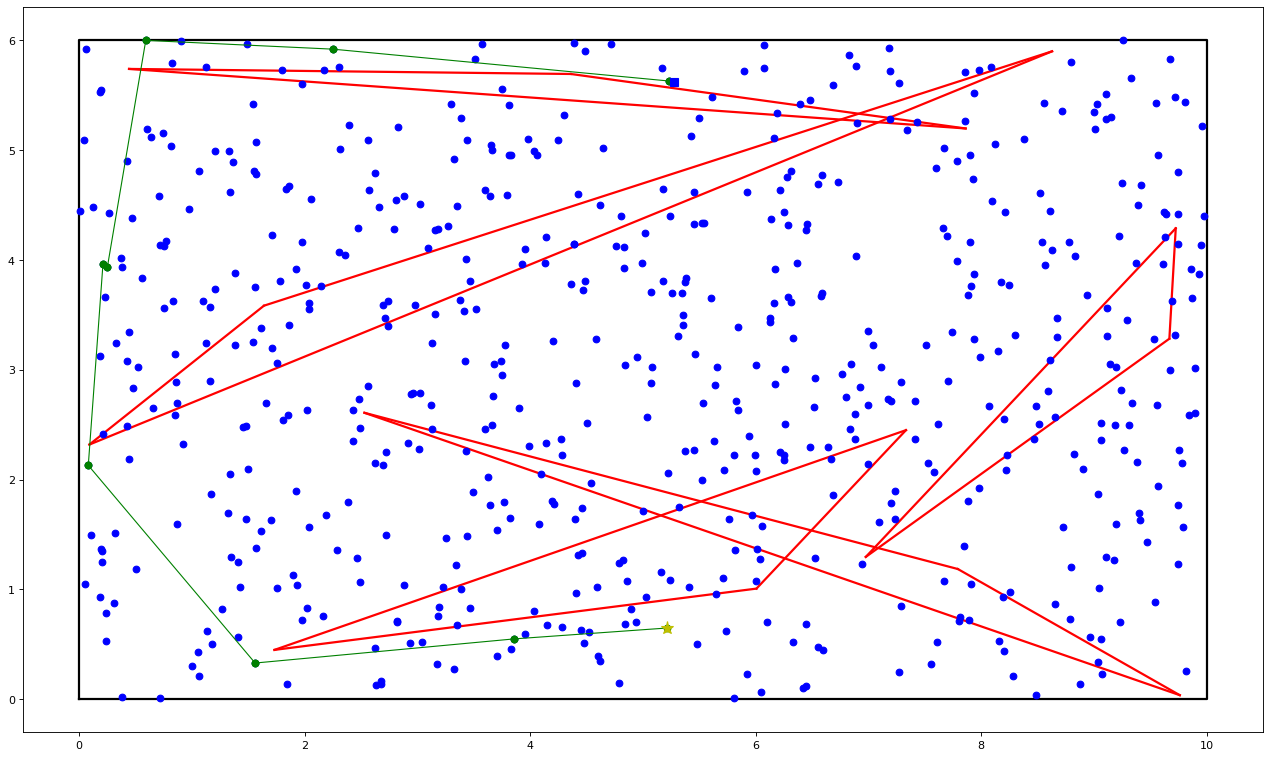

In [14]:
pl.ion()
np.random.seed(4)
env = environment_2d.Environment(10, 6, 5)
pl.clf()
pl.figure(figsize=(20, 12), dpi=80)
env.plot()
for i in range(len(vert)):
    pl.plot(vert[i][0],vert[i][1], 'bo')
for i in range(len(shortest)-1):
    dot1 = shortest[i]
    dot2 = shortest[i+1]
    pl.plot([vert_f[dot1][0],vert_f[dot2][0]], [vert_f[dot1][1],vert_f[dot2][1]], 'go-', linewidth=1)
q = env.random_query()
if q is not None:
  x_start, y_start, x_goal, y_goal = q
  env.plot_query(x_start, y_start, x_goal, y_goal)

### Troubleshooting:
#### Increase n_vert OR tresh if solution not found
#### Increase num_steps if line intersects obstacle OR decrease the tresh


# Exercise 2 : Post-processing a 2D path

In [15]:
shortest.reverse()

In [85]:
num_steps = 2000
shortest_path=[]
for i in shortest:
    shortest_path.append((vert_f[i][0], vert_f[i][1]))

In [86]:
ran = 0
tempcoor = []
for i in range(0, len(shortest_path)):
    if (i+1) < len(shortest_path):
        x= shortest_path[i][0]
        y= shortest_path[i][1]
        ran = random.random()
        x_dist = shortest_path[i][0] - shortest_path[i+1][0]
        y_dist = shortest_path[i][1] - shortest_path[i+1][1]
        x -= ran*x_dist
        y -= ran*y_dist
        tempcoor.append((x,y))
print(tempcoor)

[(5.268328808032086, 5.626431289941335), (5.008155406036754, 5.651588903439376), (0.6019275350632112, 5.999425179033098), (0.30665378545353733, 4.283255288336138), (0.229589847205953, 3.9502050763970233), (0.13158142226770553, 2.856107713460778), (0.20114679231413612, 1.9826593066449696), (2.38637052641734, 0.4090441373094847), (3.877425401467607, 0.551273365781847)]


## Showing random points along each line

<Figure size 432x288 with 0 Axes>

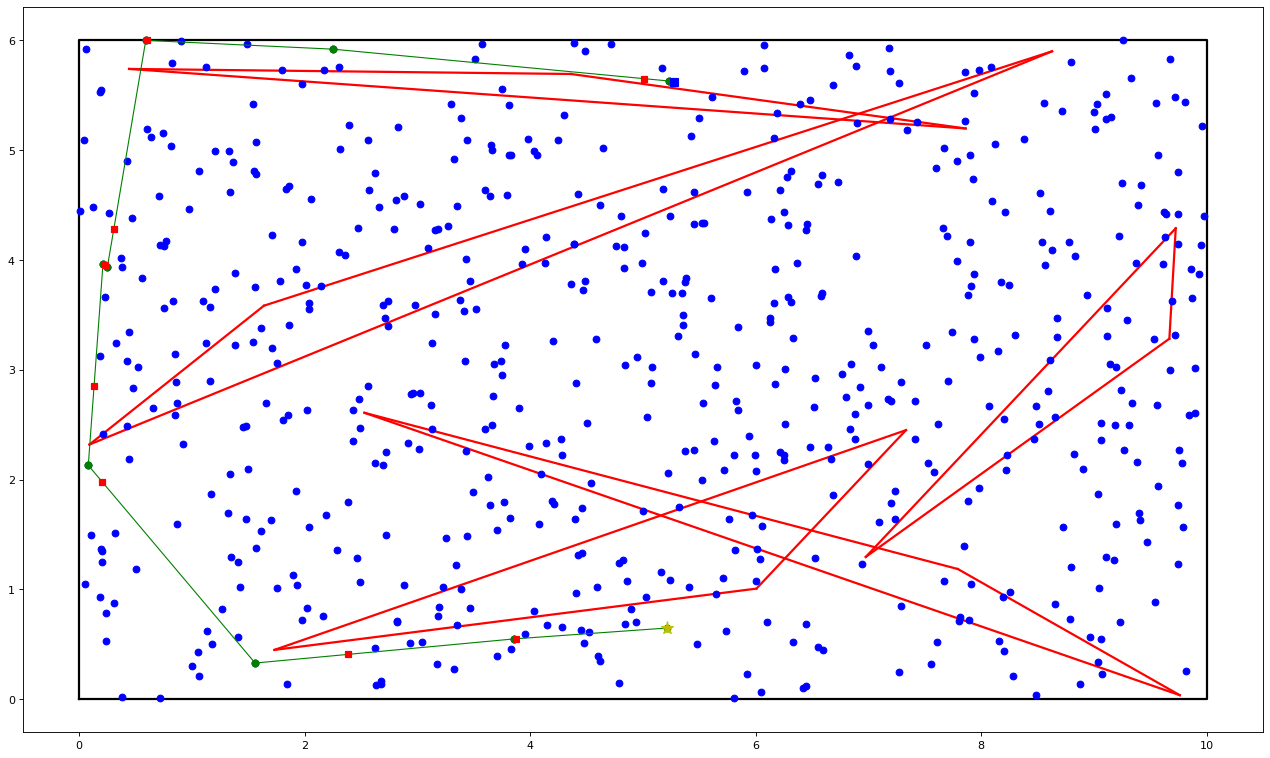

In [87]:
pl.ion()
np.random.seed(4)
env = environment_2d.Environment(10, 6, 5)
pl.clf()
pl.figure(figsize=(20, 12), dpi=80)
env.plot()
for i in range(len(vert)):
    pl.plot(vert[i][0],vert[i][1], 'bo')
for i in range(len(shortest_path)-1):
    pl.plot([shortest_path[i][0],shortest_path[i+1][0]],[shortest_path[i][1],shortest_path[i+1][1]], 'go-', linewidth=1)
for i in range(len(tempcoor)-1):
    pl.plot([tempcoor[i][0], tempcoor[i+1][0]],[tempcoor[i][1], tempcoor[i+1][1]], 'rs')
q = env.random_query()
if q is not None:
  x_start, y_start, x_goal, y_goal = q
  env.plot_query(x_start, y_start, x_goal, y_goal)

In [88]:
print(tempcoor)

[(5.268328808032086, 5.626431289941335), (5.008155406036754, 5.651588903439376), (0.6019275350632112, 5.999425179033098), (0.30665378545353733, 4.283255288336138), (0.229589847205953, 3.9502050763970233), (0.13158142226770553, 2.856107713460778), (0.20114679231413612, 1.9826593066449696), (2.38637052641734, 0.4090441373094847), (3.877425401467607, 0.551273365781847)]


In [89]:
cost=1
for i in range(0,len(tempcoor)-1,2):
    check = True
    x_dist = tempcoor[i][0] - tempcoor[i+1][0]
    y_dist = tempcoor[i][1] - tempcoor[i+1][1]
    print(x_dist)
    print(y_dist)
    x_stepsize = x_dist/num_steps
    y_stepsize = y_dist/num_steps
    x=tempcoor[i][0]
    y=tempcoor[i][1]
    for z in range(num_steps):
        x -= x_stepsize
        print(x)
        y -= y_stepsize
        print(y)
        if env.check_collision(x,y) == True:
            check = False
            break
    if check == True:
        print('NEXT')
        shortest_path.insert(i+cost,(tempcoor[i][0],tempcoor[i][1]))
        cost+=1
        shortest_path.pop(i+cost)
        shortest_path.insert(i+cost,(tempcoor[i+1][0],tempcoor[i+1][1]))

0.2601734019953321
-0.02515761349804091
5.268198721331088
5.626443868748084
5.26806863463009
5.626456447554833
5.267938547929092
5.626469026361582
5.267808461228094
5.6264816051683315
5.2676783745270965
5.626494183975081
5.267548287826099
5.62650676278183
5.267418201125101
5.626519341588579
5.267288114424103
5.626531920395328
5.267158027723105
5.626544499202077
5.267027941022107
5.626557078008826
5.266897854321109
5.626569656815575
5.266767767620111
5.626582235622324
5.266637680919113
5.626594814429073
5.266507594218115
5.6266073932358225
5.2663775075171175
5.626619972042572
5.26624742081612
5.626632550849321
5.266117334115122
5.62664512965607
5.265987247414124
5.626657708462819
5.265857160713126
5.626670287269568
5.265727074012128
5.626682866076317
5.26559698731113
5.626695444883066
5.265466900610132
5.626708023689815
5.265336813909134
5.626720602496564
5.265206727208136
5.6267331813033135
5.2650766405071385
5.6267457601100626
5.264946553806141
5.626758338916812
5.264816467105143
5.62

5.2234488961878105
5.630770978269774
5.223318809486813
5.630783557076523
5.223188722785815
5.630796135883272
5.223058636084817
5.630808714690021
5.222928549383819
5.63082129349677
5.222798462682821
5.630833872303519
5.222668375981823
5.630846451110268
5.222538289280825
5.630859029917017
5.222408202579827
5.6308716087237665
5.222278115878829
5.630884187530516
5.2221480291778315
5.630896766337265
5.222017942476834
5.630909345144014
5.221887855775836
5.630921923950763
5.221757769074838
5.630934502757512
5.22162768237384
5.630947081564261
5.221497595672842
5.63095966037101
5.221367508971844
5.630972239177759
5.221237422270846
5.630984817984508
5.221107335569848
5.630997396791257
5.22097724886885
5.6310099755980065
5.2208471621678525
5.631022554404756
5.220717075466855
5.631035133211505
5.220586988765857
5.631047712018254
5.220456902064859
5.631060290825003
5.220326815363861
5.631072869631752
5.220196728662863
5.631085448438501
5.220066641961865
5.63109802724525
5.219936555260867
5.63111060

5.637010066417326
5.158795805791854
5.637022645224075
5.158665719090856
5.637035224030824
5.158535632389858
5.637047802837573
5.1584055456888604
5.637060381644322
5.1582754589878625
5.637072960451071
5.158145372286865
5.6370855392578205
5.158015285585867
5.63709811806457
5.157885198884869
5.637110696871319
5.157755112183871
5.637123275678068
5.157625025482873
5.637135854484817
5.157494938781875
5.637148433291566
5.157364852080877
5.637161012098315
5.157234765379879
5.637173590905064
5.1571046786788814
5.637186169711813
5.1569745919778835
5.637198748518562
5.156844505276886
5.6372113273253115
5.156714418575888
5.637223906132061
5.15658433187489
5.63723648493881
5.156454245173892
5.637249063745559
5.156324158472894
5.637261642552308
5.156194071771896
5.637274221359057
5.156063985070898
5.637286800165806
5.1559338983699
5.637299378972555
5.1558038116689024
5.637311957779304
5.1556737249679045
5.637324536586053
5.155543638266907
5.6373371153928025
5.155413551565909
5.637349694199552
5.1552

5.109623032814648
5.641777434175234
5.10949294611365
5.641790012981983
5.109362859412652
5.641802591788732
5.109232772711654
5.641815170595481
5.109102686010656
5.64182774940223
5.108972599309658
5.641840328208979
5.1088425126086605
5.641852907015728
5.108712425907663
5.6418654858224775
5.108582339206665
5.641878064629227
5.108452252505667
5.641890643435976
5.108322165804669
5.641903222242725
5.108192079103671
5.641915801049474
5.108061992402673
5.641928379856223
5.107931905701675
5.641940958662972
5.107801819000677
5.641953537469721
5.107671732299679
5.64196611627647
5.1075416455986815
5.641978695083219
5.107411558897684
5.6419912738899685
5.107281472196686
5.642003852696718
5.107151385495688
5.642016431503467
5.10702129879469
5.642029010310216
5.106891212093692
5.642041589116965
5.106761125392694
5.642054167923714
5.106631038691696
5.642066746730463
5.106500951990698
5.642079325537212
5.1063708652897
5.642091904343961
5.1062407785887025
5.64210448315071
5.106110691887705
5.6421170619

5.037424913760813
5.648758671920983
5.0372948270598155
5.648771250727732
5.037164740358818
5.648783829534481
5.03703465365782
5.64879640834123
5.036904566956822
5.648808987147979
5.036774480255824
5.648821565954728
5.036644393554826
5.648834144761477
5.036514306853828
5.6488467235682265
5.03638422015283
5.648859302374976
5.036254133451832
5.648871881181725
5.036124046750834
5.648884459988474
5.0359939600498365
5.648897038795223
5.035863873348839
5.648909617601972
5.035733786647841
5.648922196408721
5.035603699946843
5.64893477521547
5.035473613245845
5.648947354022219
5.035343526544847
5.648959932828968
5.035213439843849
5.6489725116357175
5.035083353142851
5.6489850904424666
5.034953266441853
5.648997669249216
5.034823179740855
5.649010248055965
5.0346930930398575
5.649022826862714
5.03456300633886
5.649035405669463
5.034432919637862
5.649047984476212
5.034302832936864
5.649060563282961
5.034172746235866
5.64907314208971
5.034042659534868
5.649085720896459
5.03391257283387
5.649098299

0.5910024063276567
5.935926893077305
0.5908547694528519
5.935068808131956
0.5907071325780471
5.934210723186608
0.5905594957032423
5.933352638241259
0.5904118588284375
5.932494553295911
0.5902642219536327
5.931636468350562
0.5901165850788279
5.9307783834052135
0.5899689482040231
5.929920298459865
0.5898213113292183
5.929062213514516
0.5896736744544135
5.928204128569168
0.5895260375796088
5.927346043623819
0.589378400704804
5.926487958678471
0.5892307638299992
5.925629873733122
0.5890831269551944
5.9247717887877736
0.5889354900803896
5.923913703842425
0.5887878532055848
5.923055618897076
0.58864021633078
5.922197533951728
0.5884925794559752
5.921339449006379
0.5883449425811704
5.920481364061031
0.5881973057063656
5.919623279115682
0.5880496688315608
5.918765194170334
0.587902031956756
5.917907109224985
0.5877543950819513
5.9170490242796365
0.5876067582071465
5.916190939334288
0.5874591213323417
5.915332854388939
0.5873114844575369
5.914474769443591
0.5871638475827321
5.913616684498242
0.

3.7915609587712265
0.21532962137743994
3.791013910089758
0.21528061716497082
3.79046686140829
0.2152316129525017
3.7899198127268217
0.2151826087400326
3.7893727640453534
0.21513360452756347
3.788825715363885
0.21508460031509435
3.788278666682417
0.21503559610262524
3.7877316180009486
0.21498659189015612
3.7871845693194803
0.214937587677687
3.786637520638012
0.21488858346521789
3.786090471956544
0.21483957925274877
3.7855434232750755
0.21479057504027965
3.7849963745936073
0.21474157082781054
3.784449325912139
0.21469256661534142
3.7839022772306707
0.2146435624028723
3.7833552285492025
0.21459455819040318
3.782808179867734
0.21454555397793407
3.782261131186266
0.21449654976546495
3.7817140825047977
0.21444754555299583
3.7811670338233294
0.21439854134052672
3.780619985141861
0.2143495371280576
3.780072936460393
0.21430053291558848
3.7795258877789246
0.21425152870311936
3.7789788390974564
0.21420252449065025
3.778431790415988
0.21415352027818113
3.77788474173452
0.21410451606571201
3.77733

0.20013831551201366
3.621428818834596
0.20008931129954455
3.6208817701531277
0.20004030708707543
3.6203347214716595
0.1999913028746063
3.619787672790191
0.1999422986621372
3.619240624108723
0.19989329444966808
3.6186935754272547
0.19984429023719896
3.6181465267457864
0.19979528602472985
3.617599478064318
0.19974628181226073
3.61705242938285
0.1996972775997916
3.6165053807013816
0.1996482733873225
3.6159583320199133
0.19959926917485338
3.615411283338445
0.19955026496238426
3.614864234656977
0.19950126074991514
3.6143171859755086
0.19945225653744603
3.6137701372940403
0.1994032523249769
3.613223088612572
0.1993542481125078
3.6126760399311038
0.19930524390003868
3.6121289912496355
0.19925623968756956
3.6115819425681672
0.19920723547510044
3.611034893886699
0.19915823126263132
3.6104878452052307
0.1991092270501622
3.6099407965237624
0.1990602228376931
3.609393747842294
0.19901121862522397
3.608846699160826
0.19896221441275486
3.6082996504793576
0.19891321020028574
3.6077526017978894
0.1988

3.371427571403599
0.17769438620115807
3.3708805227221306
0.17764538198868896
3.3703334740406623
0.17759637777621984
3.369786425359194
0.17754737356375072
3.3692393766777258
0.1774983693512816
3.3686923279962575
0.1774493651388125
3.3681452793147892
0.17740036092634337
3.367598230633321
0.17735135671387425
3.3670511819518527
0.17730235250140514
3.3665041332703844
0.17725334828893602
3.365957084588916
0.1772043440764669
3.365410035907448
0.17715533986399778
3.3648629872259797
0.17710633565152867
3.3643159385445114
0.17705733143905955
3.363768889863043
0.17700832722659043
3.363221841181575
0.17695932301412132
3.3626747925001066
0.1769103188016522
3.3621277438186383
0.17686131458918308
3.36158069513717
0.17681231037671397
3.361033646455702
0.17676330616424485
3.3604865977742335
0.17671430195177573
3.3599395490927653
0.17666529773930661
3.359392500411297
0.1766162935268375
3.3588454517298287
0.17656728931436838
3.3582984030483605
0.17651828510189926
3.357751354366892
0.17646928088943015
3.3

0.15892577282548626
3.161360877719785
0.15887676861301714
3.1608138290383168
0.15882776440054802
3.1602667803568485
0.1587787601880789
3.1597197316753802
0.1587297559756098
3.159172682993912
0.15868075176314067
3.1586256343124437
0.15863174755067155
3.1580785856309754
0.15858274333820244
3.157531536949507
0.15853373912573332
3.156984488268039
0.1584847349132642
3.1564374395865706
0.15843573070079509
3.1558903909051024
0.15838672648832597
3.155343342223634
0.15833772227585685
3.154796293542166
0.15828871806338773
3.1542492448606976
0.15823971385091862
3.1537021961792293
0.1581907096384495
3.153155147497761
0.15814170542598038
3.152608098816293
0.15809270121351127
3.1520610501348245
0.15804369700104215
3.1515140014533563
0.15799469278857303
3.150966952771888
0.15794568857610392
3.1504199040904197
0.1578966843636348
3.1498728554089515
0.15784768015116568
3.149325806727483
0.15779867593869656
3.148778758046015
0.15774967172622745
3.1482317093645467
0.15770066751375833
3.1476846606830784
0.

0.1371679024891983
2.9184712631478753
0.13711889827672918
2.917924214466407
0.13706989406426007
2.9173771657849388
0.13702088985179095
2.9168301171034705
0.13697188563932183
2.9162830684220022
0.13692288142685272
2.915736019740534
0.1368738772143836
2.9151889710590657
0.13682487300191448
2.9146419223775974
0.13677586878944537
2.914094873696129
0.13672686457697625
2.913547825014661
0.13667786036450713
2.9130007763331927
0.13662885615203801
2.9124537276517244
0.1365798519395689
2.911906678970256
0.13653084772709978
2.911359630288788
0.13648184351463066
2.9108125816073196
0.13643283930216155
2.9102655329258513
0.13638383508969243
2.909718484244383
0.1363348308772233
2.909171435562915
0.1362858266647542
2.9086243868814465
0.13623682245228508
2.9080773381999783
0.13618781823981596
2.90753028951851
0.13613881402734684
2.9069832408370417
0.13608980981487773
2.9064361921555735
0.1360408056024086
2.905889143474105
0.1359918013899395
2.905342094792637
0.13594279717747038
2.9047950461111687
0.135

1.8064144076793915
0.446984462400749
1.8056276000947238
0.44807707426780063
1.804840792510056
0.44916968613485225
1.8040539849253883
0.45026229800190387
1.8032671773407205
0.4513549098689555
1.8024803697560527
0.4524475217360071
1.801693562171385
0.4535401336030587
1.8009067545867172
0.45463274547011034
1.8001199470020495
0.45572535733716196
1.7993331394173817
0.4568179692042136
1.798546331832714
0.4579105810712652
1.7977595242480462
0.4590031929383168
1.7969727166633784
0.46009580480536844
1.7961859090787107
0.46118841667242005
1.795399101494043
0.4622810285394717
1.7946122939093752
0.4633736404065233
1.7938254863247074
0.4644662522735749
1.7930386787400396
0.4655588641406265
1.7922518711553719
0.46665147600767815
1.7914650635707041
0.46774408787472976
1.7906782559860364
0.4688366997417814
1.7898914484013686
0.469929311608833
1.7891046408167008
0.4710219234758846
1.788317833232033
0.47211453534293624
1.7875310256473653
0.47320714720998786
1.7867442180626976
0.4742997590770395
1.785957

0.9845495009901206
1.4185182684381863
0.9856421128571722
1.4177314608535185
0.9867347247242237
1.4169446532688508
0.9878273365912753
1.416157845684183
0.9889199484583269
1.4153710380995153
0.9900125603253784
1.4145842305148475
0.99110517219243
1.4137974229301797
0.9921977840594816
1.413010615345512
0.9932903959265331
1.4122238077608442
0.9943830077935847
1.4114370001761765
0.9954756196606362
1.4106501925915087
0.9965682315276878
1.409863385006841
0.9976608433947394
1.4090765774221732
0.9987534552617909
1.4082897698375054
0.9998460671288425
1.4075029622528377
1.000938678995894
1.40671615466817
1.0020312908629456
1.4059293470835021
1.0031239027299972
1.4051425394988344
1.0042165145970487
1.4043557319141666
1.0053091264641003
1.4035689243294989
1.0064017383311519
1.402782116744831
1.0074943501982034
1.4019953091601633
1.008586962065255
1.4012085015754956
1.0096795739323066
1.4004216939908278
1.0107721857993581
1.39963488640616
1.0118647976664097
1.3988480788214923
1.0129574095334613
1.398

1.7176920637817192
0.8905703791261199
1.7187846756487708
0.8897835715414522
1.7198772875158224
0.8889967639567844
1.720969899382874
0.8882099563721166
1.7220625112499255
0.8874231487874489
1.723155123116977
0.8866363412027811
1.7242477349840286
0.8858495336181134
1.7253403468510802
0.8850627260334456
1.7264329587181317
0.8842759184487778
1.7275255705851833
0.8834891108641101
1.7286181824522349
0.8827023032794423
1.7297107943192864
0.8819154956947746
1.730803406186338
0.8811286881101068
1.7318960180533896
0.880341880525439
1.7329886299204411
0.8795550729407713
1.7340812417874927
0.8787682653561035
1.7351738536545442
0.8779814577714358
1.7362664655215958
0.877194650186768
1.7373590773886474
0.8764078426021003
1.738451689255699
0.8756210350174325
1.7395443011227505
0.8748342274327647
1.740636912989802
0.874047419848097
1.7417295248568536
0.8732606122634292
1.7428221367239052
0.8724738046787615
1.7439147485909567
0.8716869970940937
1.7450073604580083
0.8709001895094259
1.7460999723250599
0

1.9974007017469193
0.6891476374511736
1.9984933136139709
0.6883608298665058
1.9995859254810224
0.6875740222818381
2.000678537348074
0.6867872146971703
2.0017711492151258
0.6860004071125025
2.0028637610821773
0.6852135995278348
2.003956372949229
0.684426791943167
2.0050489848162805
0.6836399843584993
2.006141596683332
0.6828531767738315
2.0072342085503836
0.6820663691891637
2.008326820417435
0.681279561604496
2.0094194322844867
0.6804927540198282
2.0105120441515383
0.6797059464351605
2.01160465601859
0.6789191388504927
2.0126972678856414
0.678132331265825
2.013789879752693
0.6773455236811572
2.0148824916197445
0.6765587160964894
2.015975103486796
0.6757719085118217
2.0170677153538477
0.6749851009271539
2.018160327220899
0.6741982933424862
2.019252939087951
0.6734114857578184
2.0203455509550023
0.6726246781731506
2.021438162822054
0.6718378705884829
2.0225307746891055
0.6710510630038151
2.023623386556157
0.6702642554191474
2.0247159984232086
0.6694774478344796
2.02580861029026
0.66869064

## Showing the path shortcutting

<Figure size 432x288 with 0 Axes>

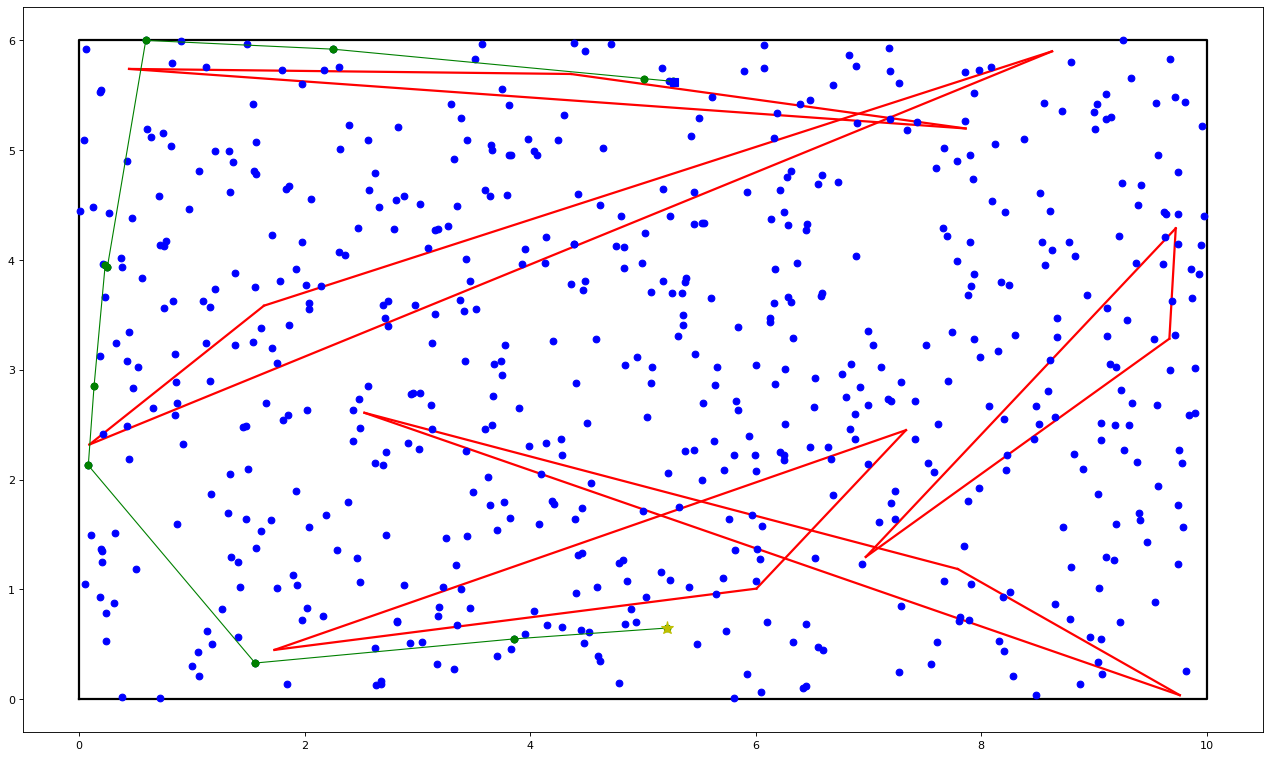

In [90]:
pl.ion()
np.random.seed(4)
env = environment_2d.Environment(10, 6, 5)
pl.clf()
pl.figure(figsize=(20, 12), dpi=80)
env.plot()
for i in range(len(vert)):
    pl.plot(vert[i][0],vert[i][1], 'bo')
for i in range(len(shortest_path)-1):
    pl.plot([shortest_path[i][0],shortest_path[i+1][0]],[shortest_path[i][1],shortest_path[i+1][1]], 'go-', linewidth=1)

q = env.random_query()
if q is not None:
  x_start, y_start, x_goal, y_goal = q
  env.plot_query(x_start, y_start, x_goal, y_goal)

# Path Shortcutting

In [91]:
repetition = 4
for i in range(repetition):
    ran = 0
    tempcoor = []
    for i in range(0, len(shortest_path)):
        if (i+1) < len(shortest_path):
            x= shortest_path[i][0]
            y= shortest_path[i][1]
            ran = random.random()
            x_dist = shortest_path[i][0] - shortest_path[i+1][0]
            y_dist = shortest_path[i][1] - shortest_path[i+1][1]
            x -= ran*x_dist
            y -= ran*y_dist
            tempcoor.append((x,y))
    cost=1
    for i in range(0,len(tempcoor)-1,2):
        check = True
        x_dist = tempcoor[i][0] - tempcoor[i+1][0]
        y_dist = tempcoor[i][1] - tempcoor[i+1][1]
        x_stepsize = x_dist/num_steps
        y_stepsize = y_dist/num_steps
        x=tempcoor[i][0]
        y=tempcoor[i][1]
        for z in range(num_steps):
            x -= x_stepsize
            y -= y_stepsize
            if env.check_collision(x,y) == True:
                check = False
                continue
        if check == True:
            shortest_path.insert(i+cost,(tempcoor[i][0],tempcoor[i][1]))
            cost+=1
            shortest_path.pop(i+cost)
            shortest_path.insert(i+cost,(tempcoor[i+1][0],tempcoor[i+1][1]))
    ran = 0
    tempcoor = []
    for i in range(0, len(shortest_path)):
        if (i+1) < len(shortest_path):
            x= shortest_path[i][0]
            y= shortest_path[i][1]
            ran = random.random()
            x_dist = shortest_path[i][0] - shortest_path[i+1][0]
            y_dist = shortest_path[i][1] - shortest_path[i+1][1]
            x -= ran*x_dist
            y -= ran*y_dist
            tempcoor.append((x,y))
    cost=1
    for i in range(1,len(tempcoor)-1,2):
        check = True
        x_dist = tempcoor[i][0] - tempcoor[i+1][0]
        y_dist = tempcoor[i][1] - tempcoor[i+1][1]
        x_stepsize = x_dist/num_steps
        y_stepsize = y_dist/num_steps
        x=tempcoor[i][0]
        y=tempcoor[i][1]
        for z in range(num_steps):
            x -= x_stepsize
            y -= y_stepsize
            if env.check_collision(x,y) == True:
                check = False
                break
        if check == True:
            shortest_path.insert(i+cost,(tempcoor[i][0],tempcoor[i][1]))
            cost+=1
            shortest_path.pop(i+cost)
            shortest_path.insert(i+cost,(tempcoor[i+1][0],tempcoor[i+1][1]))


<Figure size 432x288 with 0 Axes>

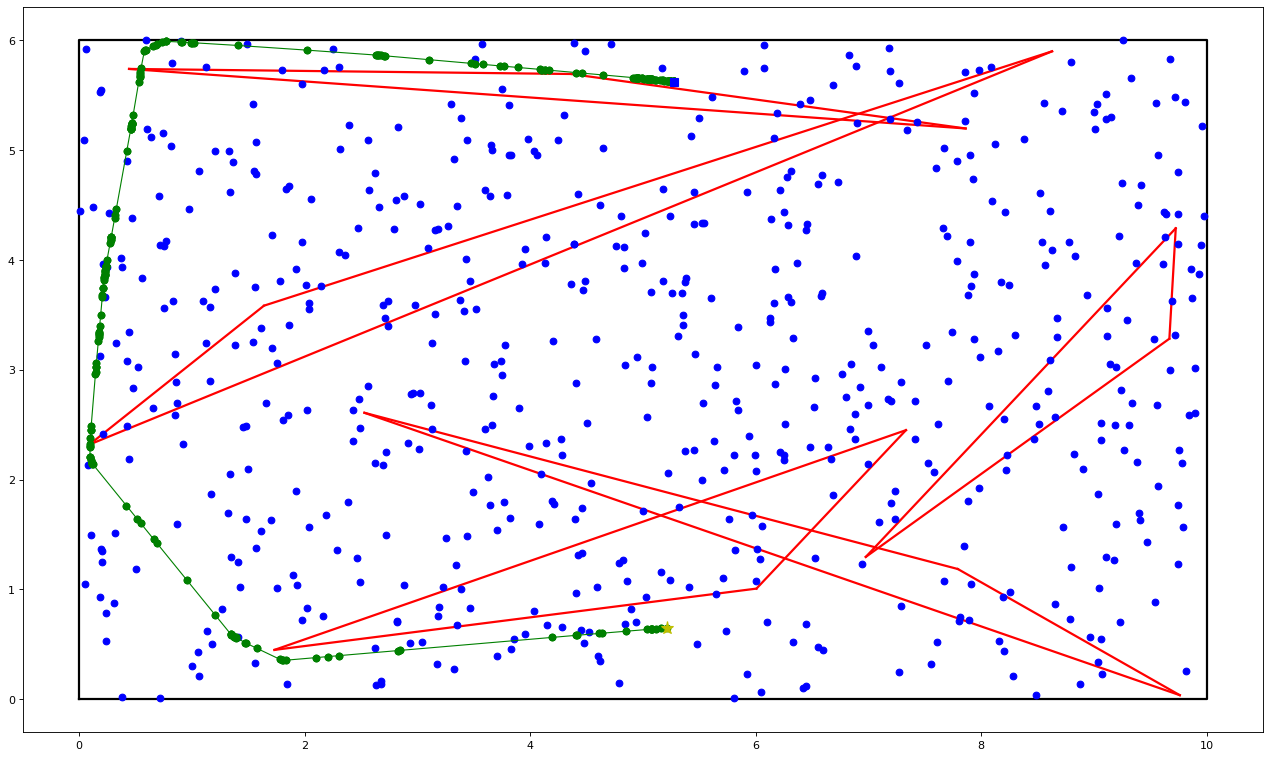

In [92]:
pl.ion()
np.random.seed(4)
env = environment_2d.Environment(10, 6, 5)
pl.clf()
pl.figure(figsize=(20, 12), dpi=80)
env.plot()
for i in range(len(vert)):
    pl.plot(vert[i][0],vert[i][1], 'bo')
for i in range(len(shortest_path)-1):
    pl.plot([shortest_path[i][0],shortest_path[i+1][0]],[shortest_path[i][1],shortest_path[i+1][1]], 'go-', linewidth=1)

q = env.random_query()
if q is not None:
  x_start, y_start, x_goal, y_goal = q
  env.plot_query(x_start, y_start, x_goal, y_goal)

# Please increase num_steps if there is a collision